<a href="https://colab.research.google.com/github/23btrec036/DAN-S-FMML_PROJECT-REPORT/blob/main/Vehicle_detection_using_supervised_Domain_adaptation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Ultralytics library
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

In [ ]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [ ]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 43.4MB/s]


100%|██████████| 134k/134k [00:00<00:00, 5.36MB/s]


image 1/1 /content/bus.jpg: 640x480 3 persons, 1 bus, 508.7ms
Speed: 32.9ms preprocess, 508.7ms inference, 45.9ms postprocess per image at shape (1, 3, 640, 480)


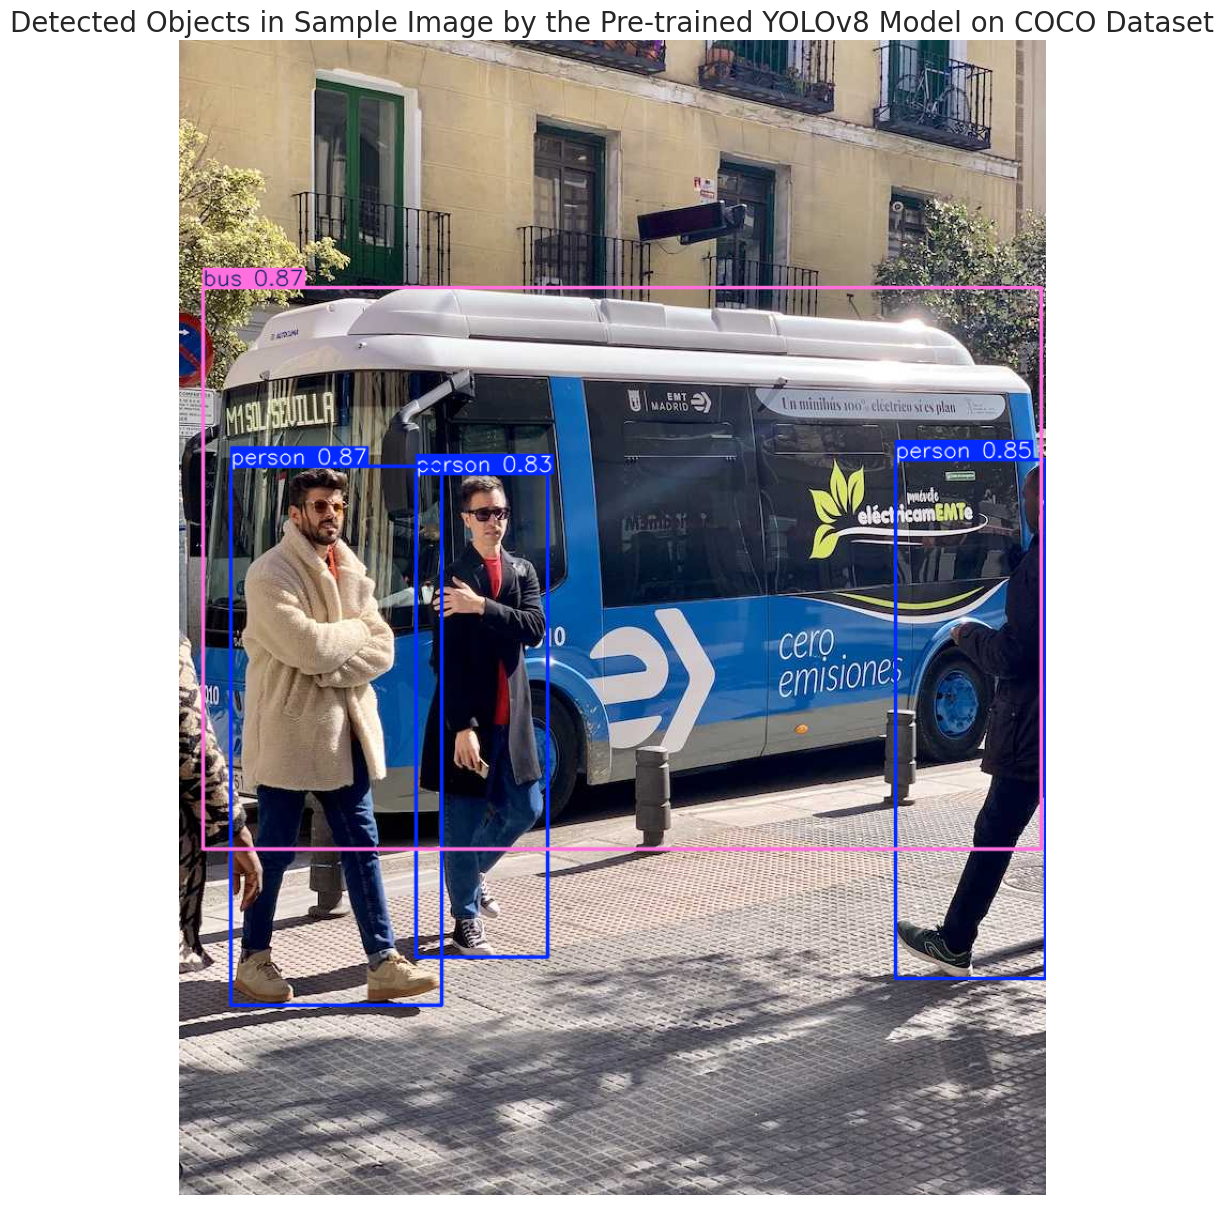

In [ ]:
# Path to the image file
image_path = image_path = 'https://raw.githubusercontent.com/ultralytics/ultralytics/main/ultralytics/assets/bus.jpg'

# Perform inference on the provided image(s)
results = model.predict(source=image_path,
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

In [ ]:
import os
import yaml
import requests

# Define the URL of the data.yaml file
yaml_url = 'https://raw.githubusercontent.com/ultralytics/yolov5/master/data/coco128.yaml'

# Define the local path to save the data.yaml file
local_yaml_path = 'data.yaml'

# Download the data.yaml file from the URL
try:
    response = requests.get(yaml_url)
    response.raise_for_status() # Raise an exception for bad status codes
    with open(local_yaml_path, 'w') as f:
        f.write(response.text)
    print(f"Downloaded data.yaml to {local_yaml_path}")

except requests.exceptions.RequestException as e:
    print(f"Error downloading the YAML file: {e}")

# Load and print the contents of the YAML file
if os.path.exists(local_yaml_path):
    with open(local_yaml_path, 'r') as file:
        yaml_content = yaml.load(file, Loader=yaml.FullLoader)
        print(yaml.dump(yaml_content, default_flow_style=False))
else:
    print("data.yaml not found locally.")

Downloaded data.yaml to data.yaml
download: https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse

In [ ]:
import os
import yaml
import requests
from PIL import Image
import matplotlib.pyplot as plt

# List all jpg images in the directory
# Add a check to see if the directory exists before listing its contents
if os.path.exists(train_images_path):
    image_files = [file for file in os.listdir(train_images_path) if file.endswith('.jpg')]

    # Select 8 images at equal intervals
    num_images = len(image_files)
    # Avoid division by zero if there are fewer than 8 images
    step = max(1, num_images // 8)
    selected_images = [image_files[i] for i in range(0, num_images, step)]

    # Create a 2x4 subplot
    fig, axes = plt.subplots(2, 4, figsize=(20, 11))

    # Display each of the selected images
    for ax, img_file in zip(axes.ravel(), selected_images):
        img_path = os.path.join(train_images_path, img_file)
        image = Image.open(img_path)
        ax.imshow(image)
        ax.axis('off')

    plt.suptitle(r"C:\Users\HP\Downloads\coco128\coco128\images\train2017\000000000194.jpg", fontsize=20)
    plt.tight_layout()
    plt.show()
else:
    print(f"Error: Directory not found at {train_images_path}")
    print("Please verify the path stored in the train_images_path variable.")

Error: Directory not found at C:\Users\HP\Downloads\archive\No_Apply_Grayscale\No_Apply_Grayscale\Vehicles_Detection.v8i.coco\train
Please verify the path stored in the train_images_path variable.


In [ ]:
# Train the model on our custom dataset
!pip install pytorch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics
import ultralytics
ultralytics.checks()

!pip install cudatoolkit==11.8.0 -f https://download.pytorch.org/whl/torch_stable.html

results = model.train(
    data=yaml_file_path,     # Path to the dataset configuration file
    epochs=100,              # Number of epochs to train for
    imgsz=640,               # Size of input images as integer
    device=0,                # Device to run on, i.e. cuda device=0
    patience=50,             # Epochs to wait for no observable improvement for early stopping of training
    batch=32,                # Number of images per batch
    optimizer='auto',        # Optimizer to use, choices=[SGD, Adam, Adamax, AdamW, NAdam, RAdam, RMSProp, auto]
    lr0=0.0001,              # Initial learning rate
    lrf=0.1,                 # Final learning rate (lr0 * lrf)
    dropout=0.1,             # Use dropout regularization
    seed=0                   # Random seed for reproducibility
)